# Extracting Tesla Stock Data Using yfinance 

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


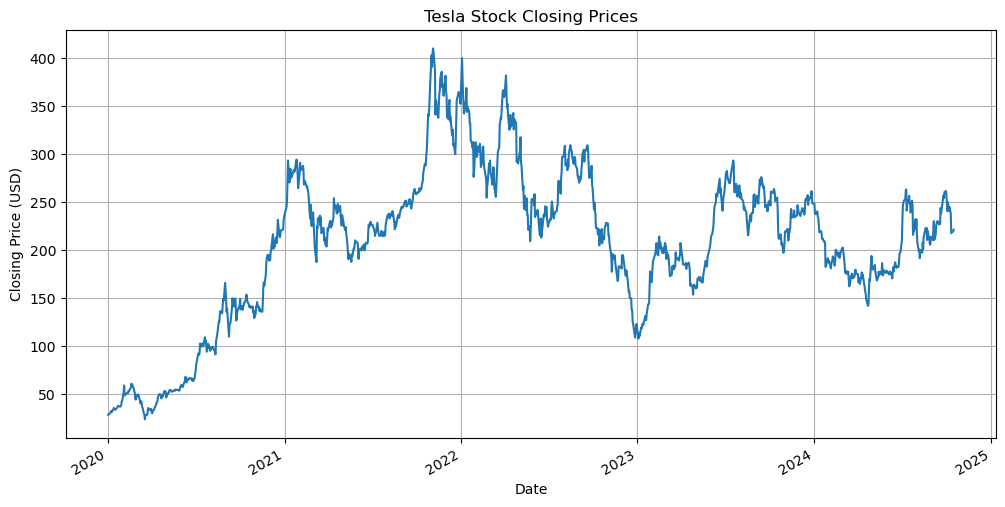

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'TSLA'
start_date = '2020-01-01'  # Start date for data
end_date = '2024-10-17'     # End date for data

tesla_data = yf.download(symbol, start=start_date, end=end_date)

print(tesla_data.head())

tesla_data['Close'].plot(title='Tesla Stock Closing Prices', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid()
plt.show()

In [9]:
# Step 1: Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 2: Define the URL for Tesla's revenue data
url = "https://www.marketwatch.com/investing/stock/tsla/financials"

# Step 3: Set headers to simulate a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
}

# Step 4: Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Step 5: Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Step 6: Locate the revenue data in the parsed HTML
    revenue_table = soup.find('table', class_='table table--overflow align--right')

    # Check if the table was found
    if revenue_table:
        # Step 7: Extract the data from the table
        revenue_data = []
        rows = revenue_table.find_all('tr')
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure there are at least two columns
                year = cols[0].text.strip()  # Year
                revenue = cols[1].text.strip()  # Revenue
                revenue_data.append({'Year': year, 'Revenue': revenue})

        # Step 8: Convert the data into a DataFrame
        revenue_df = pd.DataFrame(revenue_data)

        # Step 9: Display the revenue DataFrame
        print(revenue_df)
    else:
        print("Revenue table not found.")
else:
    print(f"Failed to retrieve data: {response.status_code}")


Failed to retrieve data: 401
